# Tarefa 03

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os Tutores
- Divirta-se :)

In [2]:
import pandas as pd
import requests

####  1) Lendo de APIs
Vimos em aula como carregar dados públicos do governo através de um API (*Application Programming Interface*). No exemplo de aula, baixamos os dados de pedidos de verificação de limites (PVL) realizados por estados, e selecionamos apenas aqueles referentes ao estado de São Paulo.

1. Repita os mesmos passos feitos em aula, mas selecione os PVLs realizados por municípios no estado do Rio de Janeiro.
2. Quais são os três *status* das solicitações mais frequentes na base? Quais são suas frequências?
3. Construa uma nova variável que contenha o ano do **status**. Observe que ```data_status``` vem como tipo *object* no **DataFrame**. Dica: você pode usar o método ```.str``` para transformar o tipo da variável em string, em seguida um método como [**slice()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) ou [**split()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).
4. Indique a frequência de cada ano do campo construído no item (3).

In [ ]:
# 1) Seu código aqui
url = 'http://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf=RJ&tipo_interessado=Estado'
r = requests.get(url)
r.status_code
data_json = r.json()

pvl = pd.DataFrame(data_json['items'])

pvl.head(n=5)


In [ ]:
# 2) Seu código aqui

status = pd.DataFrame(pvl.groupby('status').size().sort_values(ascending=False),columns =['Freq'])
status

<AxesSubplot:xlabel='status'>

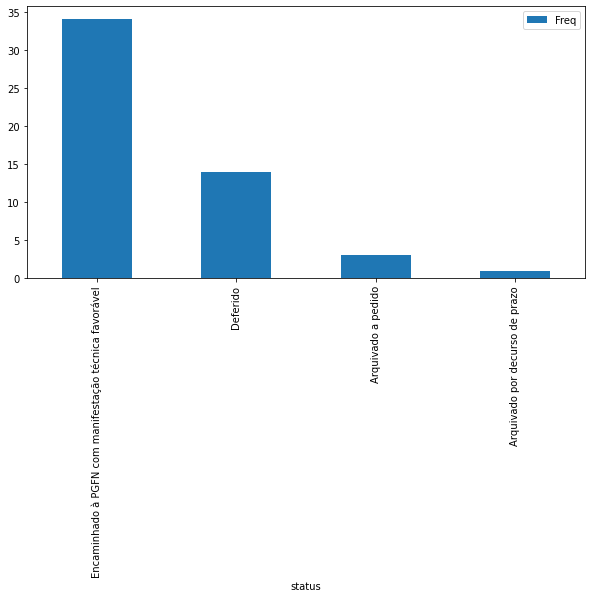

In [4]:
status.plot.bar(y='Freq',figsize = (10,5))

In [5]:
# 3) Seu código aqui
pvl.dtypes
dataStatus = pvl['data_status']
listaDataStatus = []
separado = []
status = []

for data in dataStatus:
    listaDataStatus.append(str(data))

for x in listaDataStatus:
    separado.append(x.split('/'))

for y in separado:
    status.append(y[2])
        
coluna_status = pd.DataFrame(status,columns=['Ano'])        

pvlComAno = pvl.insert(0,'Ano',coluna_status.values)
pvl



,Ano,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,2012,7255,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000532/2012-31,2012-05-24T03:00:00Z,Operação contratual interna (com garantia da U...,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,3.645563e+09,1,0,29/05/2012
1,2011,5516,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000131/2011-09,2011-06-30T03:00:00Z,Operação contratual externa (com garantia da U...,Desenvolvimento sustentável,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar dos EUA,4.850000e+08,1,0,04/07/2011
2,2011,8556,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000797/2010-78,2011-06-30T03:00:00Z,Operação contratual externa (com garantia da U...,Multissetorial,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar dos EUA,1.120000e+08,1,0,04/07/2011
3,2012,7080,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000492/2012-28,2012-04-16T03:00:00Z,Operação contratual externa (com garantia da U...,Multissetorial,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar dos EUA,3.000000e+08,1,0,03/09/2012
4,2013,5630,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000158/2013-55,2013-10-22T02:00:00Z,Operação contratual externa (com garantia da U...,Fortalecimento Institucional,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar dos EUA,4.800000e+07,1,0,21/11/2013
5,2013,5635,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000159/2013-08,2013-04-08T03:00:00Z,Operação contratual interna (com garantia da U...,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,3.135800e+09,1,0,06/05/2013
6,2013,5640,Estado,Rio de Janeiro,33,RJ,None,Arquivado a pedido,17944.000160/2013-24,2013-03-18T03:00:00Z,Operação contratual externa (com garantia da U...,Infraestrutura,Instituição Financeira Internacional,Bank of America Merrill Lynch,Dólar dos EUA,7.164179e+08,0,0,29/07/2013
7,2013,5645,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000161/2013-79,2013-04-08T03:00:00Z,Operação contratual interna (com garantia da U...,Infraestrutura,Instituição Financeira Nacional,Banco Nacional de Desenvolvimento Econômico e ...,Real,3.031405e+09,1,0,06/05/2013
8,2009,13271,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.001999/2008-12,2009-07-01T03:00:00Z,Operação contratual externa (com garantia da U...,Desenvolvimento rural,Instituição Financeira Internacional,Banco Internacional para Reconstrução e Desenv...,Dólar dos EUA,3.950000e+07,1,0,07/07/2009
9,2016,5918,Estado,Rio de Janeiro,33,RJ,None,Encaminhado à PGFN com manifestação técnica fa...,17944.000233/2012-05,2012-04-16T03:00:00Z,Operação contratual externa (com garantia da U...,Infraestrutura,Instituição Financeira Internacional,Corporação Andina de Fomento,Dólar dos EUA,3.196750e+08,1,0,11/03/2016


In [24]:
# 4)
frequenciaPorAno = pd.DataFrame(pvl.groupby('Ano').size(),columns = ['Frequência'])

frequenciaPorAno

,Frequência
Ano,
2002,4
2006,2
2008,2
2009,9
2010,3
2011,6
2012,11
2013,7
2014,4


<AxesSubplot:title={'center':'Quantidade PVL ao longo do tempo Estado RJ'}, xlabel='Ano'>

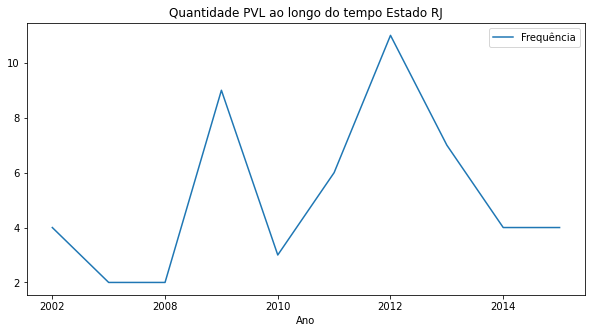

In [7]:
frequenciaPorAno.plot.line(y='Frequência',figsize = (10,5),title='Quantidade PVL ao longo do tempo Estado RJ')

####  2) Melhorando a interação com o API
Observe dois URLs de consultas diferentes, por exemplo o URL utilizado em aula, e o URL feito no exercício anterior. Compare-os e observe as diferenças.

1. Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado (```'Estado'```ou ```Município```), e que devolve os dados da consulta no formato *DataFrame*.
2. Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com *status* em 'Arquivado por decurso de prazo' estão registradas?
3. Qual é o município da Bahia com mais solicitações deferidas?
4. Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'

In [6]:
#1) Seu código aqui
#uf_a = input('Insira a UF no formato: ').upper()
#tipoInteressado_a = input('Informe o Tipo de Interessado (Estado ou Município):').capitalize()


def busca_Dados_Pvl(uf:str,tipoInteressado:str)-> str:
    url = f'http://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf={uf}&tipo_interessado={tipoInteressado}'
    r = requests.get(url)
    data_json = r.json()
    pvl = pd.DataFrame(data_json['items'])
    return pvl
    
busca_Dados_Pvl('RJ','Município')

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,29667,Município,Rio de Janeiro,3304557,RJ,PVL02.001468/2018-39,Deferido,17944.107905/2018-90,2018-09-05T16:18:30Z,Operação contratual interna,PNAFM,Instituição Financeira Nacional,Caixa Econômica Federal,Real,4.900000e+07,1,1,13/09/2018
1,44142,Município,Parati,3303807,RJ,PVL02.000434/2021-22,Deferido (PVL-IF),None,None,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Banco do Brasil S/A,Real,4.652519e+06,0,1,20/07/2021
2,42449,Município,Guapimirim,3301850,RJ,PVL02.001018/2020-61,Deferido (PVL-IF),None,None,Operação contratual interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco do Brasil S/A,Real,1.300000e+06,0,1,20/05/2020
3,26368,Município,Rio de Janeiro,3304557,RJ,PVL02.002098/2017-76,Deferido,17944.102249/2017-58,2017-11-29T19:03:49Z,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,2.000000e+08,1,0,04/12/2017
4,11032,Município,Petrópolis,3303906,RJ,None,Arquivado a pedido,17944.001341/2013-78,2017-03-31T17:18:53Z,Operação contratual interna (com garantia da U...,PAC 2 - Pró-Transporte - Pavimentação e Qualif...,Instituição Financeira Nacional,Caixa Econômica Federal,Real,3.704687e+07,0,0,19/12/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,7535,Município,Belford Roxo,3300456,RJ,None,Arquivado,17944.000601/2010-45,2010-11-16T02:00:00Z,Operação contratual interna,PAC - Pró-Moradia - 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,5.588982e+07,0,0,27/12/2010
219,5180,Município,Nova Iguaçu,3303500,RJ,None,Deferido,17944.000053/2007-58,2007-07-27T03:00:00Z,Operação contratual interna,PNAFM,Instituição Financeira Nacional,Caixa Econômica Federal,Real,1.130667e+07,1,0,02/08/2007
220,6153,Município,Cardoso Moreira,3301157,RJ,None,Arquivado,17944.000288/2008-21,2008-05-14T03:00:00Z,Operação contratual interna,Caminho da Escola,Instituição Financeira Nacional,Banco do Brasil S/A,Real,4.028550e+05,0,0,15/05/2008
221,5054,Município,Duque de Caxias,3301702,RJ,None,Deferido,17944.000031/2008-79,2008-03-27T03:00:00Z,Operação contratual interna,PAC - Pró-Moradia - 2008,Instituição Financeira Nacional,Caixa Econômica Federal,Real,3.990000e+07,0,0,28/03/2008


In [17]:
# 2) Seu código aqui
novoDataframe = busca_Dados_Pvl('MG','Estado')
novoDataframe.groupby('status').size()
len(novoDataframe[novoDataframe['status']=='Arquivado por decurso de prazo'])

1

In [50]:
# 3) Seu código aqui

novoDataframe = busca_Dados_Pvl('BA','Município')
qtdePvlPorMunicipio = pd.DataFrame(novoDataframe.groupby('interessado').size().sort_values(ascending = False),columns = ['Qtde'])
municipioMaisSolicitacoes = qtdePvlPorMunicipio[qtdePvlPorMunicipio['Qtde'] == max(qtdePvlPorMunicipio['Qtde'])]
municipioMaisSolicitacoes

,Qtde
interessado,
Camaçari,18


In [55]:
# 4) Seu código aqui
bahiaEstadoCsv =  busca_Dados_Pvl('BA','Estado')
bahiaEstadoCsv.to_csv('BApvlestado.csv',sep=';',encoding = 'UTF-8',index=False)